<a href="https://colab.research.google.com/github/Aritra153/Bank_note-verification-using-K-Means-clustering/blob/main/Bank_Note_Verification_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
bank_data=pd.read_csv("Banknote verify_dataset.csv")

In [4]:
bank_data["V1"]

0       3.62160
1       4.54590
2       3.86600
3       3.45660
4       0.32924
         ...   
1367    0.40614
1368   -1.38870
1369   -3.75030
1370   -3.56370
1371   -2.54190
Name: V1, Length: 1372, dtype: float64

In [5]:
bank_data["V2"]

0        8.66610
1        8.16740
2       -2.63830
3        9.52280
4       -4.45520
          ...   
1367     1.34920
1368    -4.87730
1369   -13.45860
1370    -8.38270
1371    -0.65804
Name: V2, Length: 1372, dtype: float64

In [6]:
a=len(bank_data["V1"])  # or bank_data["V2"], as both values should be same
a

1372

In [7]:
stack_array=np.zeros((a,2)) #an empty array initialized with zeros to stack the columns 'V1 and 'V2' in the form of a 2-D array

In [8]:
#Stacking the columns
for i in range(a):
    stack_array[i][0]=bank_data["V1"][i]
    stack_array[i][1]=bank_data["V2"][i]
stack_array

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

In [9]:
currency_mean=np.mean(stack_array,axis=0)

In [10]:
currency_mean #calculating the mean of the columns "V1" and "V2" for the above dataset

array([0.43373526, 1.92235312])

In [11]:
currency_stdv=np.std(stack_array,axis=0) #calculating the standard devia

In [12]:
currency_stdv

array([2.84172641, 5.86690749])

In [13]:
import matplotlib.pyplot as plt

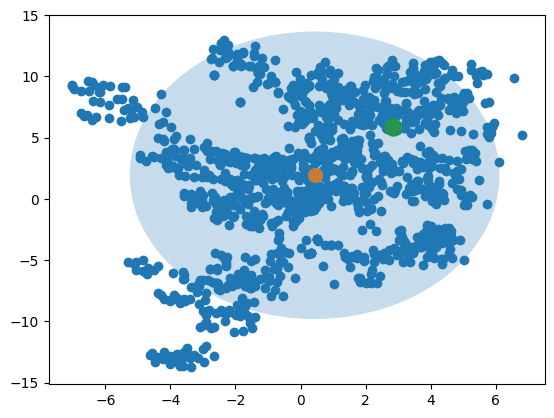

In [14]:
import matplotlib.patches as patches          # MEAN:denoted by orange point, STANDARD DEVIATION:denoted by green point
fig,graph=plt.subplots()
graph.scatter(stack_array[:,0],stack_array[:,1])
graph.scatter(currency_mean[0],currency_mean[1],s=100)
graph.scatter(currency_stdv[0],currency_stdv[1],s=150)
ellipse=patches.Ellipse([currency_mean[0],currency_mean[1]],currency_stdv[0]*4,currency_stdv[1]*4,alpha=0.25)
graph.add_patch(ellipse)

In the above example, I set the center of the ellipse to be the 'mean' and the major and minor axis to be '4' times the x("V1") and y("V2") components of 'standard deviation'. The points lying outside the ellipse can be considered to be 'outliers' according to my scaling. But one may set this value(4) to another value as well depending upon the spread of the points in the dataset.These Outliers can be told as "Forged notes"(or not genuine notes).

In the below section I have implemented K-Means Clustering Algorithm from Scratch using Python Data Structures

I have stacked the 2D array containing my datapoints in a dictionary, where the key('Vi') gives the ith data-point in the form of a Tuple.

In [15]:
features_dict={}
for i in range(a):
    features_dict['V'+str(i+1)]=(stack_array[i][0],stack_array[i][1])
#features_dict

I have randomly allocated "k" points as the initial cluster centers, where k denotes the no.of clusters we need to form. Here in this case k is 2, as there are 2 categories of notes, **'Genuine'** and **'Forged'**. I have stored the cluster centers in a dictionary **cluster_centers**, with the key **"Ci"** denoting the ith center. Later I have defined functions to allocate the data-points to the centers, hence forming the clusters; Further I have updated the cluster centers using the basic principle of **K-Means clustering algorithm**, running loops until the center point values **converge**(or stop changing)

In [16]:
import random

In [17]:
k=2  # No.of clusters
random_arr=np.random.randint(low=1, high=a, size=k)
random_arr

array([329, 186])

In [18]:
cluster_centers={}
for j in range(k):
    cluster_centers["C"+str(j+1)]=features_dict['V'+str(random_arr[j])]
cluster_centers

{'C1': (3.5152, 6.8224), 'C2': (-1.2537, 10.8803)}

In [19]:
import math
def dist(t1,t2):
    d=math.sqrt(math.pow((t1[0]-t2[0]),2)+math.pow((t1[1]-t2[1]),2))
    return d

In [20]:
x=features_dict['V1']  #Testing Cell
y=features_dict['V2']
dist(x,y)

1.0502533884734668

In the cell below I have distributed the datapoints among the 2 clusters centers

In [21]:
def assign_cluster(num_clusters,features_dict,cluster_centers):
    k=num_clusters
    a=len(features_dict.keys())
    cluster_group={}
    for i in range(1,k+1):
        cluster_group['C'+str(i)]=[]
    for i in range(1,a+1):
        d_lst=[]
        for j in range(1,k+1):
            x=features_dict['V'+str(i)]
            d=dist(x,cluster_centers["C"+str(j)])
            d_lst.append(d)
        idx=d_lst.index(min(d_lst))
        cluster_group['C'+str(idx+1)].append(features_dict['V'+str(i)])
    return cluster_group

In [22]:
cluster_group=assign_cluster(2,features_dict,cluster_centers)

In [23]:
len(cluster_group['C2'])

185

I have changed the cluster centers following the principle of K-Means clustering. I have run the loop several times until the center value stops changing or converges

In [24]:
def summa(lst):
    s=0
    x=len(lst)
    for i in range(x):
        s=s+lst[i]
    return s



def change_center(cluster_group):
    k=len(cluster_group.keys())
    lst1_0=[]
    lst1_1=[]
    cluster1_center={}
    for i in range(1,k+1):
        for j in range(0,len(cluster_group['C'+str(i)])):
            lst1_0.append(cluster_group['C'+str(i)][j][0])
            lst1_1.append(cluster_group['C'+str(i)][j][1])
        cluster1_center['C'+str(i)]=((summa(lst1_0)/len(cluster_group['C'+str(i)])),(summa(lst1_1)/len(cluster_group['C'+str(i)])))
    return cluster1_center


In [25]:
cluster_group

{'C1': [(3.6216, 8.6661),
  (4.5459, 8.1674),
  (3.866, -2.6383),
  (3.4566, 9.5228),
  (0.32924, -4.4552),
  (4.3684, 9.6718),
  (3.5912, 3.0129),
  (2.0922, -6.81),
  (3.2032, 5.7588),
  (1.5356, 9.1772),
  (1.2247, 8.7779),
  (3.9899, -2.7066),
  (1.8993, 7.6625),
  (3.404, 8.7261),
  (4.6765, -3.3895),
  (2.6719, 3.0646),
  (0.80355, 2.8473),
  (1.4479, -4.8794),
  (5.2423, 11.0272),
  (5.7867, 7.8902),
  (0.3292, -4.4552),
  (3.9362, 10.1622),
  (4.4338, 9.887),
  (0.7057, -5.4981),
  (1.1432, -3.7413),
  (6.5633, 9.8187),
  (4.8906, -3.3584),
  (-0.24811, -0.17797),
  (1.4884, 3.6274),
  (4.2969, 7.617),
  (-1.6162, 0.80908),
  (2.4391, 6.4417),
  (2.6881, 6.0195),
  (3.6289, 0.81322),
  (4.5679, 3.1929),
  (3.4805, 9.7008),
  (4.1711, 8.722),
  (0.96441, 5.8395),
  (2.8561, 6.9176),
  (2.0843, 6.6258),
  (3.9102, 6.065),
  (1.6349, 3.286),
  (4.3239, -4.8835),
  (5.262, 3.9834),
  (3.1452, 5.825),
  (2.549, 6.1499),
  (4.9264, 5.496),
  (4.8265, 0.80287),
  (2.5635, 6.7769),
  (

In [26]:
cluster_centers

{'C1': (3.5152, 6.8224), 'C2': (-1.2537, 10.8803)}

In [27]:
cluster_centers1=change_center(cluster_group)

In [28]:
cluster_centers1

{'C1': (0.849610037910699, 0.8747428660488649),
 'C2': (3.216674448648647, 14.256586389189208)}

In [29]:
#number of clusters=2
cluster_group1=assign_cluster(2,features_dict,cluster_centers1)
cluster_group1

{'C1': [(3.866, -2.6383),
  (0.32924, -4.4552),
  (3.5912, 3.0129),
  (2.0922, -6.81),
  (3.2032, 5.7588),
  (3.9899, -2.7066),
  (4.6765, -3.3895),
  (2.6719, 3.0646),
  (0.80355, 2.8473),
  (1.4479, -4.8794),
  (0.3292, -4.4552),
  (0.7057, -5.4981),
  (1.1432, -3.7413),
  (4.8906, -3.3584),
  (-0.24811, -0.17797),
  (1.4884, 3.6274),
  (-1.6162, 0.80908),
  (2.4391, 6.4417),
  (2.6881, 6.0195),
  (3.6289, 0.81322),
  (4.5679, 3.1929),
  (0.96441, 5.8395),
  (2.8561, 6.9176),
  (2.0843, 6.6258),
  (3.9102, 6.065),
  (1.6349, 3.286),
  (4.3239, -4.8835),
  (5.262, 3.9834),
  (3.1452, 5.825),
  (2.549, 6.1499),
  (4.9264, 5.496),
  (4.8265, 0.80287),
  (2.5635, 6.7769),
  (5.807, 5.0097),
  (3.1377, -4.1096),
  (2.888, 0.44696),
  (0.49665, 5.527),
  (1.7939, -1.1174),
  (5.4021, 3.1039),
  (2.5367, 2.599),
  (4.6054, -4.0765),
  (3.9529, -2.3548),
  (4.1373, 0.49248),
  (4.1654, -3.4495),
  (2.3066, 3.5364),
  (0.049175, 6.1437),
  (0.24835, 7.6439),
  (1.1317, 3.9647),
  (4.4682, 2.2

In [30]:
len(cluster_group1['C2'])

274

In [31]:
for i in range(90):
    cluster_centers1=change_center(cluster_group1)
    cluster_group1=assign_cluster(2,features_dict,cluster_centers1)

In [32]:
cluster_centers1

{'C1': (-0.3394273275862065, -6.053135344827579),
 'C2': (0.5811374736328138, 2.57565281445313)}

In [33]:
len(cluster_group1['C2'])

1024

In [34]:
cluster_center_arr=np.zeros((k,2)) #k=No.of cluster centers
for i in range(k):
    for j in range(2):
        cluster_center_arr[i][j]=cluster_centers1['C'+str(i+1)][j]
cluster_center_arr

array([[-0.33942733, -6.05313534],
       [ 0.58113747,  2.57565281]])

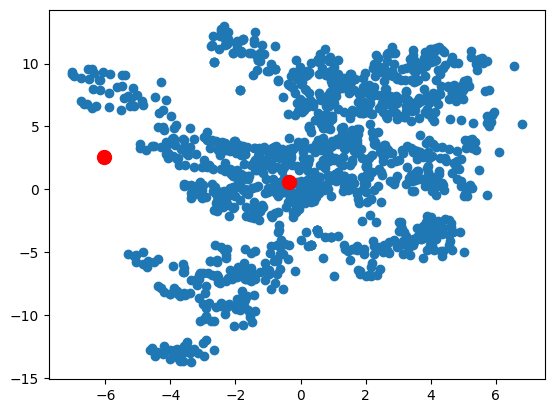

In [35]:
plt.scatter(stack_array[:,0],stack_array[:,1])
plt.scatter(cluster_center_arr[0],cluster_center_arr[1],s=100,color='r')

Now here if we take all the datapoints belonging to one of the cluster_centers catering to "Genuine bank notes" and all the other datapoints belonging to the other cluster center as "Forge Bank notes", then it would be easy to segregate any new note entering the bank, by predicting whether it is "Genuine" or "Forge" if we get to know the "V1" and "V2" values of the note. Here in the given dataset, we find that among 1372 data-points, 1024 belong to the cluster corresponding to the cluster_center C_2=    ( 0.58113747,  2.57565281).Seeing this we can build a general intuition that cluster center "C_2" corresponds to the "Genuine" category cluster of notes. So any datapoint nearing this cluster center will have a very high chance of belonging to a note of "Genuine" category. Hence for any new datapoint, we can find out the Euclidean distance of it's "V1" and "V2" values from the cluster center C_2 and C_1=(-0.33942733, -6.05313534). We can say that if the distance value is less w.r.t C_1 as compared to C_2, the note is Genuine. Otherwise the note is "Forge".

In [37]:
cluster_group1

{'C1': [(3.866, -2.6383),
  (0.32924, -4.4552),
  (2.0922, -6.81),
  (3.9899, -2.7066),
  (4.6765, -3.3895),
  (1.4479, -4.8794),
  (0.3292, -4.4552),
  (0.7057, -5.4981),
  (1.1432, -3.7413),
  (4.8906, -3.3584),
  (4.3239, -4.8835),
  (3.1377, -4.1096),
  (4.6054, -4.0765),
  (3.9529, -2.3548),
  (4.1654, -3.4495),
  (4.1197, -2.7956),
  (2.4486, -6.3175),
  (-0.64472, -4.6062),
  (2.1616, -6.8804),
  (3.3669, -5.1856),
  (4.5597, -2.4211),
  (3.3397, -4.6145),
  (3.9922, -4.4676),
  (0.9297, -3.7971),
  (3.7818, -2.8846),
  (3.2697, -4.3414),
  (3.9232, -3.2467),
  (0.5195, -3.2633),
  (2.4226, -4.5752),
  (3.9479, -3.7723),
  (2.2634, -4.4862),
  (4.1927, -3.2674),
  (4.0552, -2.4583),
  (3.583, -3.7971),
  (-0.13144, -1.7775),
  (3.2585, -4.4614),
  (4.5645, -3.6275),
  (2.7365, -5.0325),
  (0.9297, -3.7971),
  (4.0215, -2.1914),
  (4.0026, -3.5943),
  (3.1219, -3.137),
  (3.8905, -2.1521),
  (4.2134, -2.806),
  (4.5691, -4.4552),
  (4.1425, -3.6792),
  (3.0934, -2.9177),
  (0.929

Calculation of the **Silhoutte Index** for the 2 clusters

In [40]:
def Slhoutte_Score(pt,cluster_center_dict):
  req_idx=0

  x=len(cluster_center_dict.keys())
  same_arr=np.zeros(x)
  for i in range(x):
    for j in range(len(cluster_center_dict['C'+str(i+1)])):
      if(cluster_center_dict['C'+str(i+1)][j]==(pt[0],pt[1])):
        same_arr[i]=1

  for i in range(x):
    if(same_arr[i]==1):
      req_idx=i+1

  same_sum=0
  for k in range(len(cluster_center_dict['C'+str(req_idx)])):
    same_sum=same_sum+dist(pt,cluster_center_dict['C'+str(req_idx)][k])
  same_sum=same_sum/(len(cluster_center_dict['C'+str(req_idx)])-1)

  #diff_sum=0
  idx_lst=[]
  for i in range(x):
    idx_lst.append(i)
  idx_lst.remove(req_idx-1)
  surr_cluster_dist_lst=[]
  for i in range(len(idx_lst)):
    diff_sum=0
    for j in range(len(cluster_center_dict['C'+str(idx_lst[i]+1)])):
      diff_sum=diff_sum+dist(pt,cluster_center_dict['C'+str(idx_lst[i]+1)][j])
    surr_cluster_dist_lst.append(diff_sum)
    surr_cluster_dist_lst[i]=surr_cluster_dist_lst[i]/len(cluster_center_dict['C'+str(idx_lst[i]+1)])

  b=min(surr_cluster_dist_lst)
  a=same_sum
  m=max(a,b)
  silhoutte_score=(b-a)/m

  return silhoutte_score



I have created a dictionary named **'silhoutte_dict'** below with keys 'S1','S2' to hold the **Silhoutte coefficient** value for each of datapoints corresponding to the Cluster Centers 'C1','C2' respectively.

In [53]:
silhoutte_dict={}
s_len=len(cluster_centers1.keys())
for i in range(s_len):
  silhoutte_dict['S'+str(i+1)]=[]
for i in range(s_len):
  for j in range(len(cluster_group1['C'+str(i+1)])):
    silhoutte_dict['S'+str(i+1)].append(Slhoutte_Score(cluster_group1['C'+str(i+1)][j],cluster_group1))

silhoutte_dict


{'S1': [0.3194035210359556,
  0.5858992445198997,
  0.6191042191797954,
  0.32352174810468465,
  0.3626744610762425,
  0.5913913643439681,
  0.5858996764103672,
  0.6318096080107731,
  0.5168916225774917,
  0.3477786172810922,
  0.4787312936466498,
  0.493833289484904,
  0.41960533690778173,
  0.2771994684079401,
  0.3955957386345201,
  0.329083536508351,
  0.6016664218376525,
  0.5987175230311063,
  0.6170774295578935,
  0.5377265672048359,
  0.2617402117773422,
  0.5154548423354092,
  0.476623081523247,
  0.5258568209263651,
  0.353570884652353,
  0.5036821572695155,
  0.38782514055060974,
  0.47492560976502207,
  0.5479945876922089,
  0.4337464746650717,
  0.547789710391141,
  0.3770829481162547,
  0.2880206312372119,
  0.4526547428995154,
  0.2476092084394009,
  0.5110003915330851,
  0.38921793315687986,
  0.5585003829721878,
  0.5258568209263651,
  0.25077320297221783,
  0.4164643568103084,
  0.40567243418946436,
  0.24912875363402423,
  0.32608956942073275,
  0.4443590056066494,


In [54]:
len(silhoutte_dict['S1']) #Testing Cell

348

In [56]:
# Average Silhoutte score calculation

sum_sl_coef=0
for i in range(s_len):
  for j in range(len(silhoutte_dict['S'+str(i+1)])):
    sum_sl_coef=sum_sl_coef+silhoutte_dict['S'+str(i+1)][j]

average_silhoutte_score=sum_sl_coef/1372


In [57]:
print(average_silhoutte_score)

0.46715972692326424


Now I have taken input from the user and printed whether the bank_note is Forged or Genuine

In [60]:
input_tuple=(0.6176,0.4331) #Input from user
d1=dist(input_tuple,cluster_centers1['C'+str(1)])
d2=dist(input_tuple,cluster_centers1['C'+str(2)])
if(d1>d2):
  print("The note is Genuine")
else:
  print("The note is Forged")


The note is Genuine
